# Katrina Tropical Cyclone ADCIRC EXAMPLE

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

## Katrina ADCIRC set-up

In [2]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
import adcircpy

/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
from adcircpy.outputs import (
    Maxele,
    MaximumElevationTimes,
    Fort63,
    Fort61,
    Minpr,
    Maxwvel,
    Maxvel,
)

/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


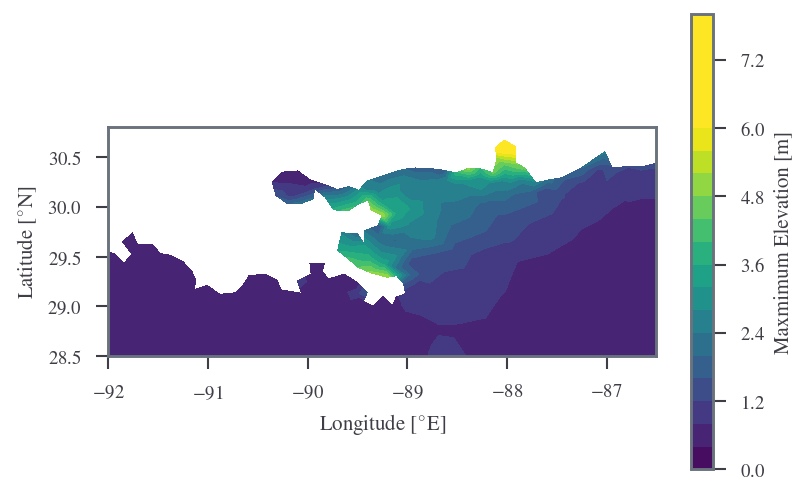

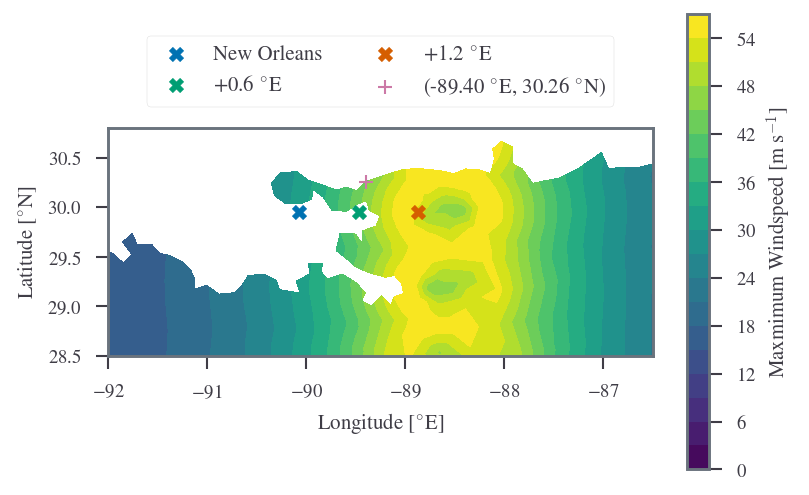

In [23]:
import os
from src.constants import NO_BBOX, DATA_PATH, NEW_ORLEANS

plot_defaults()


folder = os.path.join(DATA_PATH, "katd_h08")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
plt.show()

path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())

plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, label="New Orleans")
plt.scatter(NEW_ORLEANS.lon + 0.6, NEW_ORLEANS.lat, label="+0.6 $^{\circ}$E")
plt.scatter(NEW_ORLEANS.lon + 1.2, NEW_ORLEANS.lat, label="+1.2 $^{\circ}$E")
plt.scatter(-89.40, 30.26, marker="+", label="(-89.40 $^{\circ}$E, 30.26 $^{\circ}$N)")

plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, 1.45), ncol=2
),  # fancybox=True, shadow=True)
plt.show()

In [5]:
from src.constants import KAT_EX_PATH, NO_BBOX

In [6]:
import os

In [7]:
os.listdir(KAT_EX_PATH)

['minpr.63.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'run.sh',
 'adcirc_log.txt',
 'maxele.63.nc',
 'comparison.log',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'control',
 'fort.224',
 'fort.223',
 'fort.222']

In [32]:
for filename in [
    "fort.217",
    "fort.218",
    "fort.221",
    "fort.222",
    "fort.223",
    "fort.224",
]:
    with open(os.path.join(KAT_EX_PATH, filename)) as file:
        print(len([x for x in file]))

19377
38697
70057
140057
19377
38697


In [37]:
for filename in ["fort.14", "fort.15", "fort.16", "fort.22", "fort.33"]:
    with open(os.path.join(KAT_EX_PATH, filename)) as file:
        print(len([x for x in file]))

25087
562
35082
3
0


In [36]:
import netCDF4 as nc

for filename in ["fort.63.nc", "fort.64.nc", "fort.73.nc", "fort.74.nc"]:
    with nc.Dataset(os.path.join(KAT_EX_PATH, filename)) as nc_ds:
        print(nc_ds.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: model time
    standard_name: time
    units: seconds since 2020-04-28 00:00:00
    base_date: 2020-04-28 00:00:00
unlimited dimensions: time
current shape = (252,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'x': <class 'netCDF4._netCDF4.Variable'>
float64 x(node)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
    positive: east
unlimited dimensions: 
current shape = (8303,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'y': <class 'netCDF4._netCDF4.Variable'>
float64 y(node)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    positive: north
unlimited dimensions: 
current shape = (8303,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'element': <class 'netCDF4._netCDF4.Variable'>
int32 element(nele, nvertex)
    long_name: element
    cf_role: face_node_connectivity
    start_index: 1
    units: non

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

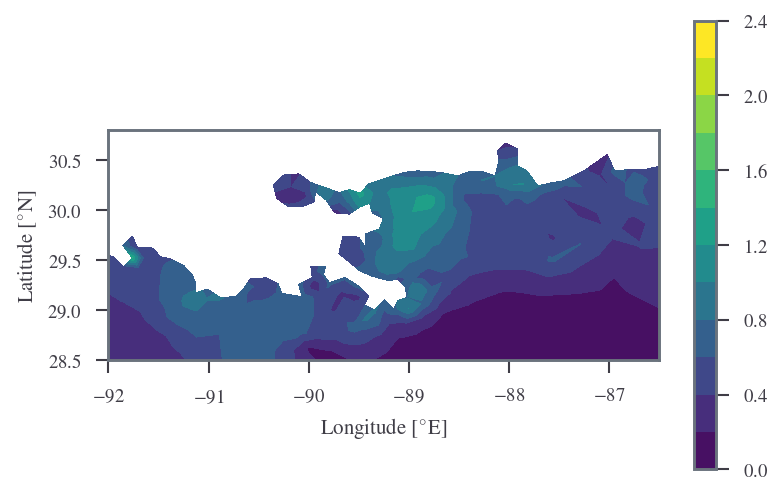

In [24]:
maxvel = Maxvel(os.path.join(KAT_EX_PATH, "maxvel.63.nc"), crs="EPSG:4326")
maxvel.tricontourf(cbar=True, levels=14)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

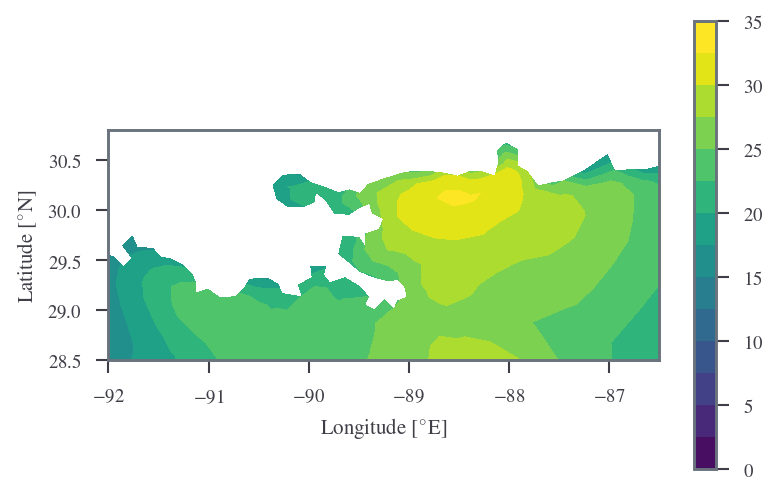

In [25]:
maxwvel = Maxwvel(os.path.join(KAT_EX_PATH, "maxwvel.63.nc"), crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=14)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

<AxesSubplot:>

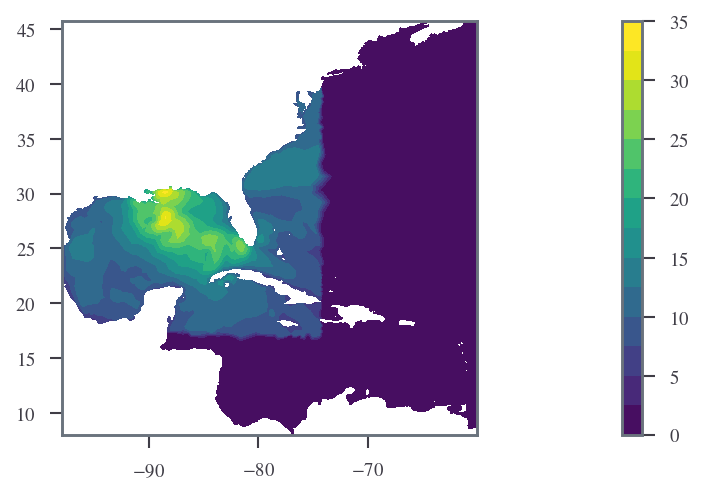

In [27]:
maxwvel.tricontourf(cbar=True, levels=14)

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

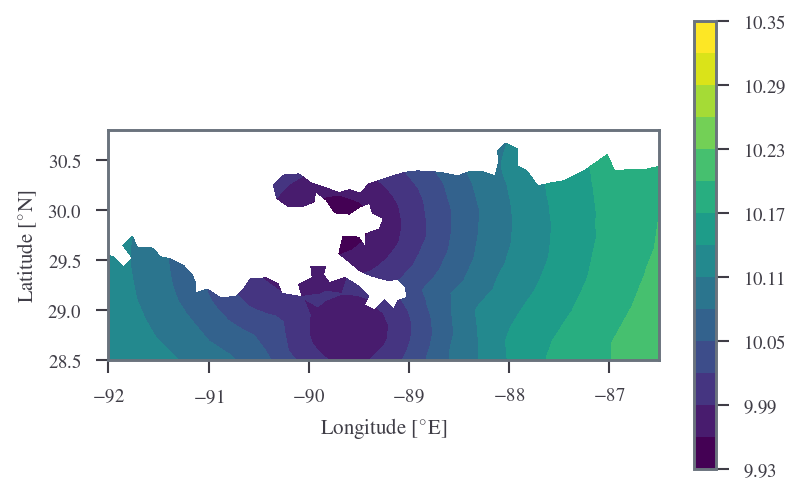

In [26]:
minpr = Minpr(os.path.join(KAT_EX_PATH, "minpr.63.nc"), crs="EPSG:4326")
minpr.tricontourf(cbar=True, levels=14)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [8]:
fort61 = Fort61(os.path.join(KAT_EX_PATH, "fort.61.nc"))
# fort61.tricontourf(cbar=True)
# NO_BBOX.ax_lim(plt.gca())
# fort61.stations()
# plt.xlabel("Longitude [$^{\circ}$E]")
# plt.ylabel("Latitude [$^{\circ}$N]")

## ADCIRC inputs structure

- fort.11  = density initial conditions
- fort.13 = nodal attributes
- fort.14 = mesh
- fort.15 = input parameters
- fort.19 = Non periodic, time varying elevation boundary condition file if eleveation specificed boundary nodes.
- fort.20 = Non periodic, Normal Flux Boundary Condition.
- fort.22 = Meteorological Forcing
- fort.23 = Wave radiation stress frocing
- fort.61, fort.62, fot.81, fort.71, fort.71 = elevation, velocity, concentation, met stations
- fort.63, fort.64, fort.83, fort.73, fort.74 = global elevation, velocity, concentratiion, met


- fort.217 = pressure (mb)
- fort.221 = pressure (mb)
- fort.223 = pressure (mb)
- fort.218, fort.222, fort.224 = wind (knots?)

A) (mb)
- fort.217 = Oceanweather WIN/PRE Format                            2005082500     2005083121
iLat=  46iLong=  60DX=0.0500DY=0.0500SWLat=28.60000SWLon=-90.2800DT=200508250000

A) 
- fort.218 = Oceanweather WIN/PRE Format                            2005082500     2005083121
iLat=  46iLong=  60DX=0.0500DY=0.0500SWLat=28.60000SWLon=-90.2800DT=200508250000

B)
- fort.221 = Oceanweather WIN/PRE Format                            2005082500     2005083121
iLat= 100iLong= 100DX=0.2500DY=0.2500SWLat=17.00000SWLon=-99.0000DT=200508250000

B)
- fort.222 = Oceanweather WIN/PRE Format                            2005082500     2005083121
iLat= 100iLong= 100DX=0.2500DY=0.2500SWLat=17.00000SWLon=-99.0000DT=200508250000

C) (mb)
- fort.223 = Oceanweather WIN/PRE Format                            2005082500     2005083121
iLat=  46iLong=  60DX=0.1500DY=0.1500SWLat=25.75000SWLon=-92.2000DT=200508250000

C)
- fort.224 = Oceanweather WIN/PRE Format                            2005082500     2005083121 
iLat=  46iLong=  60DX=0.1500DY=0.1500SWLat=25.75000SWLon=-92.2000DT=200508250000

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

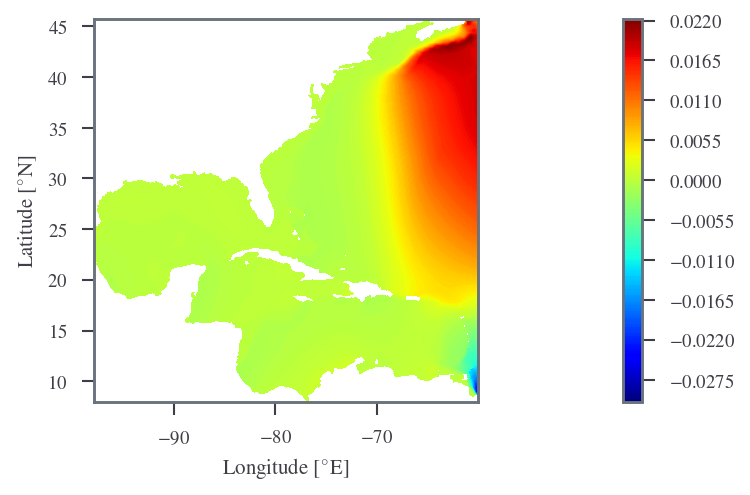

In [19]:
plot_defaults()

fort63 = Fort63(os.path.join(KAT_EX_PATH, "fort.63.nc"))
fort63.tricontourf(cbar=True)
# NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [10]:
import netCDF4 as nc

nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))

In [11]:
nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2022-09-08 16:41:45  01:00
    modification_date: 2022-09-08 16:41:45  01:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [12]:
nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2022-09-08 16:41:45  01:00
    modification_date: 2022-09-08 16:41:45  01:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [13]:
maxele = Maxele(os.path.join(KAT_EX_PATH, "maxele.63.nc"), crs="EPSG:4326")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

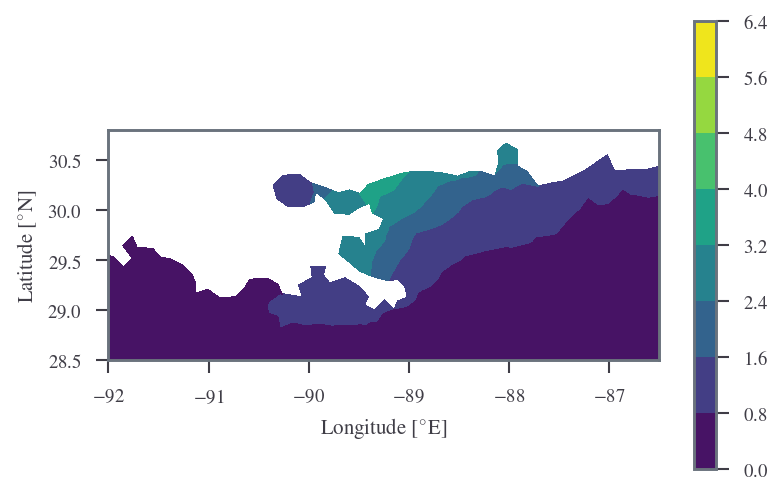

In [14]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

plot_defaults()
maxele = Maxele(os.path.join(KAT_EX_PATH, "maxele.63.nc"), crs="EPSG:4326")
maxele.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

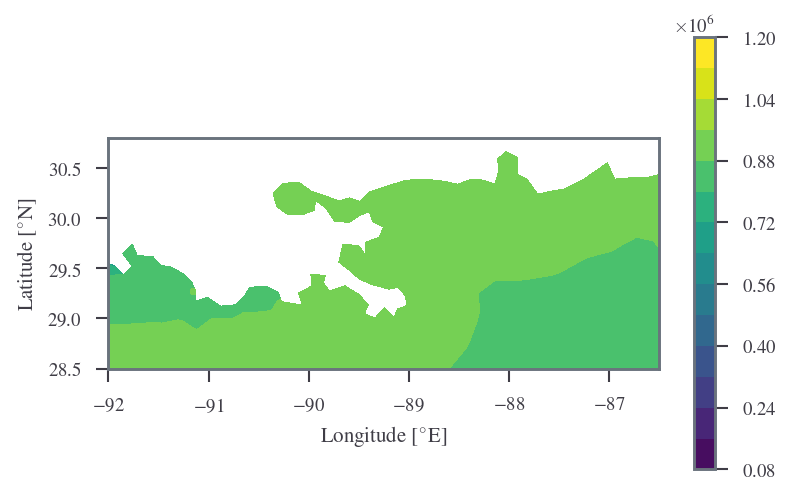

In [15]:
plot_defaults()
maxvel = MaximumElevationTimes(
    os.path.join(KAT_EX_PATH, "maxele.63.nc"), crs="EPSG:4326"
)
maxvel.tricontourf(cbar=True, levels=14)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

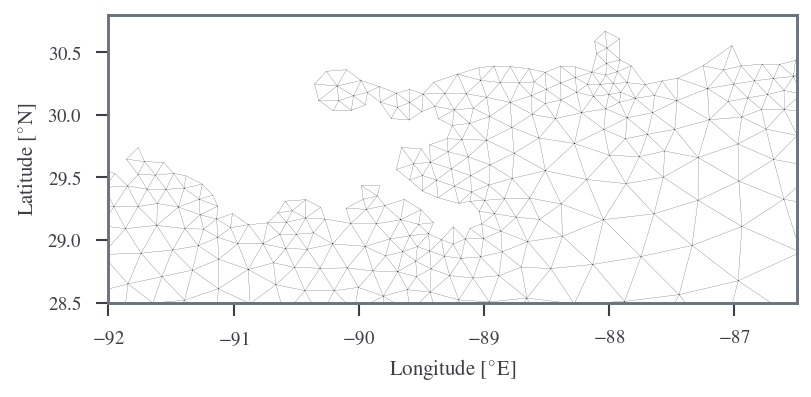

In [16]:
plot_defaults()
maxele.triplot(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

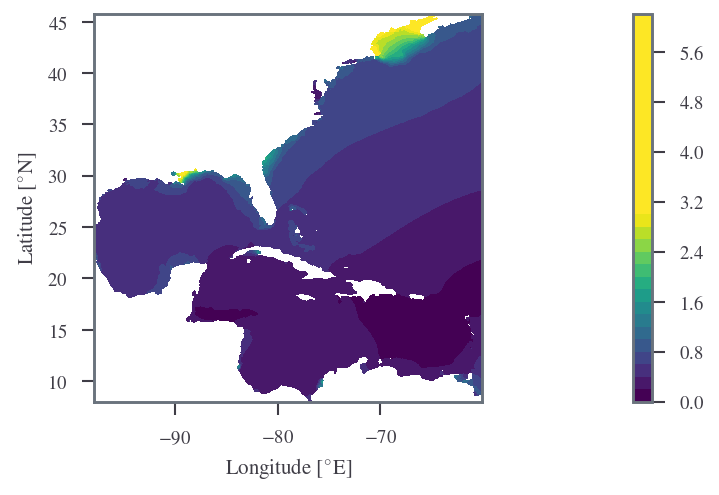

In [17]:
plot_defaults()
maxele.tricontourf(cbar=True, vmax=3, levels=30)
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
# plt.tight_layout()

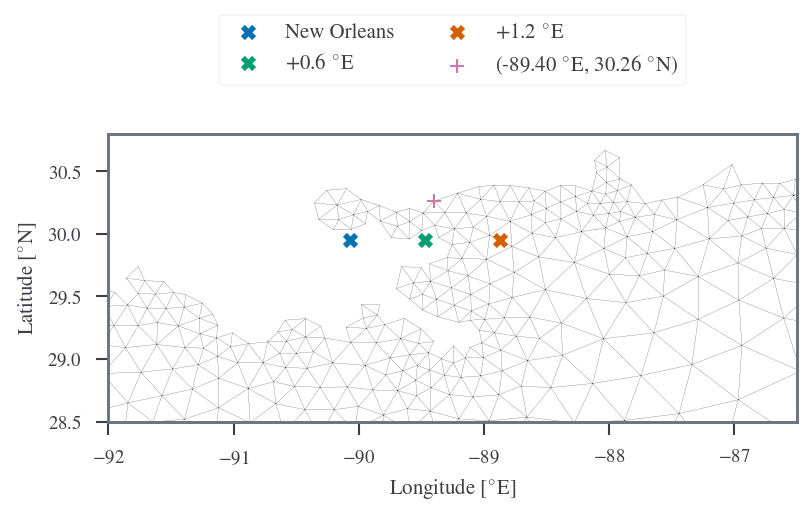

In [25]:
maxele.triplot()
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, label="New Orleans")
plt.scatter(NEW_ORLEANS.lon + 0.6, NEW_ORLEANS.lat, label="+0.6 $^{\circ}$E")
plt.scatter(NEW_ORLEANS.lon + 1.2, NEW_ORLEANS.lat, label="+1.2 $^{\circ}$E")
plt.scatter(-89.40, 30.26, marker="+", label="(-89.40 $^{\circ}$E, 30.26 $^{\circ}$N)")

plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, 1.45), ncol=2
),  # fancybox=True, shadow=True)

NO_BBOX.ax_lim(plt.gca())